In [1]:

#import required for libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.inspection import DecisionBoundaryDisplay
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score


## Multiple Layer Perceptron - Description

In the following we provide a quick summary of the fundamental concepts
involved with multiple layer perceptron (MLP).


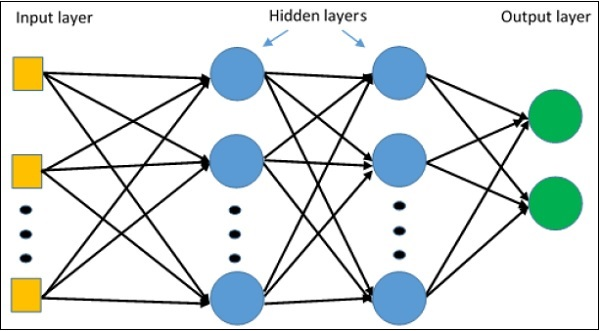


The network consists of neurons which form layers. these layers are
called the input layer, hidden layers and output layer. often the
number of neurons in the input layer corresponds to the number of
features. The neurons in this layer simply pass their value to the next
layer. The hidden layers facilitate the magic of neural networks and the
output layer is where the model, you guessed it, outputs the solution.

The following equation is the mathematical representation of going from
input to output in a neural network.

$$
\hat{y}= \sigma\left( w^{T}x+b \right)
$$

Here $u$ is the transposed vector of weights, $x$ the value of the
previous neuron and $b$ a bias. $\sigma$ is the main focus of this
researchquestion. more on this later. The goal of learning in this
context is to tune hyperparameters to minimise the sum of all errors
between $\hat{y}$ and target $y$.




Each example is led trough the network, this is called
forwardpropagation. The model produces an output which, because MLP is a
supervised method, we can compare to the expected output and construct
an average-cost-function. The goal is now to adjust weights and biases
to minimise this function via a process called backpropagation.

$$
AL(w^{T},b) = \frac{1}{m}\sum_{i=1}^{m} L \left( \hat{y}^{(i)}, y^{(i)} \right)
$$


Function L represents the way the loss for each example is calculated.
Commonly used loss-functions are regression mean squared error (MSE) for
regression problems and binary cross-entropy or binary classification.


$$
MSE = \left( y_i - \hat{y}_i  \right)^2
$$
$$
\text{Binary cross-entropy} = - \left( y_i \log{ \left( \hat{y}_i \right) } + \left( 1 - y_i \right) \log{ \left( 1 - \hat{y}_i \right)}  \right)
$$




## How do different activation functions compare for classification using MLP?

### Linear activation

In [2]:
def linear(x):
    ''' y = f(x) It returns the input as it is'''
    return x

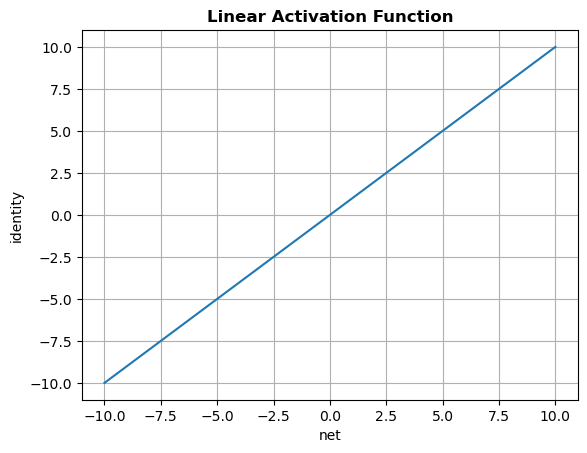

In [3]:
x = np.linspace(-10, 10)
plt.plot(x, linear(x))
plt.xlabel("net")
plt.ylabel("identity")
plt.grid()
plt.title('Linear Activation Function', fontweight="bold")
plt.show()

The linear activation function also known as the identity function is probably the most easy to understand function, it just maps the input to itself so has no effect on the weighted sum of the input. 

$$
f \left( x \right) = x
$$

### Sigmoid Activation

In [4]:
def sigmoid(x):
    ''' It returns 1/(1+exp(-x)). where the values lies between zero and one '''
    return 1/(1+np.exp(-x))

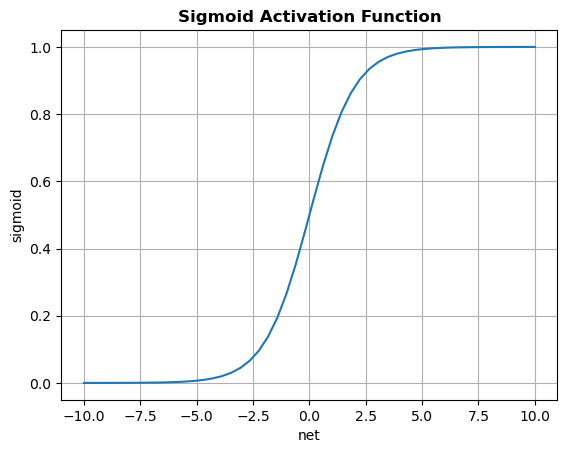

In [5]:
x = np.linspace(-10, 10)
plt.plot(x, sigmoid(x))
plt.xlabel("net")
plt.ylabel("sigmoid")
plt.grid()
plt.title('Sigmoid Activation Function', fontweight="bold")
plt.show()

The sigmoid function compresses to any real value input to a $[0, 1]$ range. The larger the input becomes, the closer the output approaches 1.  The ouput approaches 0 when the input becomes smaller.

$$
f(x) = \frac{1}{1 + e^{-x}}
$$

### Tanh Activation

In [6]:
def tanh(x):
    ''' It returns the value (1-exp(-2x))/(1+exp(-2x)) and the value returned will be lies in between -1 to 1.'''

    return np.tanh(x)

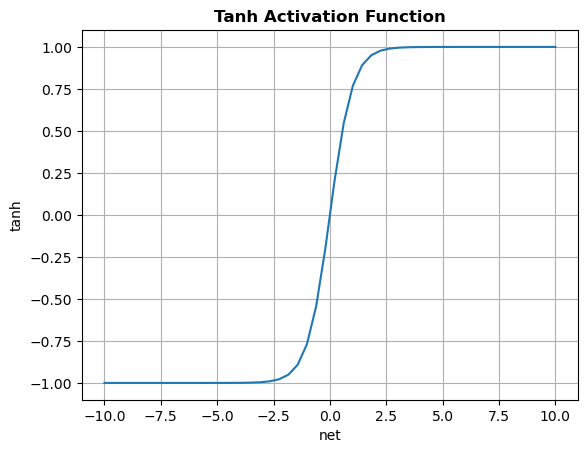

In [7]:
x = np.linspace(-10, 10)
plt.plot(x, tanh(x))
plt.xlabel("net")
plt.ylabel("tanh")
plt.grid()
plt.title('Tanh Activation Function', fontweight="bold")
plt.show()

The behavior of the Tanh activation function has mostly the same charasteristics as the sigmoid function. The most important difference is than when using tanh the input is mapped to a $[-1, 1]$ range.

$$
f(x) = \frac{(e^x - e^{-x})}{(e^x + e^{-x})}
$$


### RELU Activation

In [8]:
def RELU(x):
    ''' It returns zero if the input is less than zero otherwise it returns the given input. '''
    x1=[]
    for i in x:
        if i<0:
            x1.append(0)
        else:
            x1.append(i)

    return x1

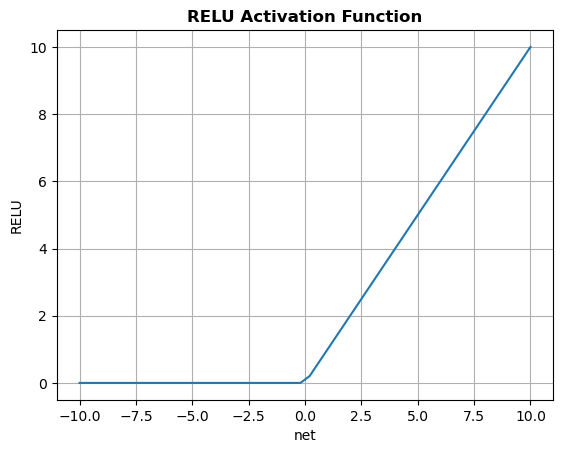

In [9]:
x = np.linspace(-10, 10)
plt.plot(x, RELU(x))
plt.xlabel("net")
plt.ylabel("RELU")
plt.grid()
plt.title('RELU Activation Function', fontweight="bold")
plt.show()

Relu outputs 0 for all negative inputs and the identity of the input for all positive inputs. 

$$
f(x) = max(0, x)
$$

### Overlay

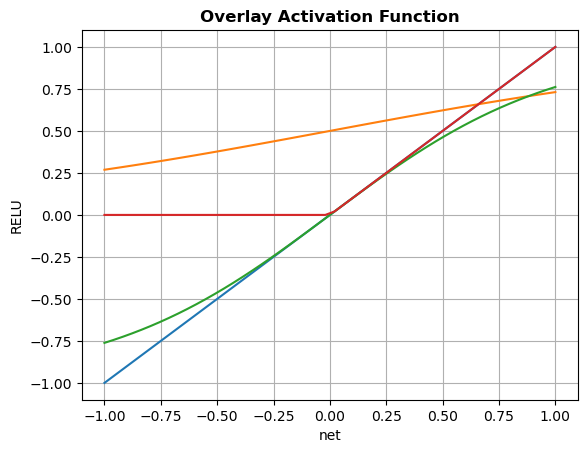

In [10]:
x = np.linspace(-1, 1)
plt.plot(x, linear(x))
plt.plot(x, sigmoid(x))
plt.plot(x, tanh(x))
plt.plot(x, RELU(x))
plt.xlabel("net")
plt.ylabel("RELU")
plt.grid()
plt.title('Overlay Activation Function', fontweight="bold")
plt.show()

# Comparison

## Using synthetic data

https://www.geeksforgeeks.org/python-generate-test-datasets-for-machine-learning/

https://www.v7labs.com/blog/neural-networks-activation-functions#:~:text=What%20is%20a%20Neural%20Network%20Activation%20Function%3F,prediction%20using%20simpler%20mathematical%20operations.



In [37]:
def use_NN(X, y):
    
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)
    
    hidden_layers=(40, 100, 80)
    
    NN_lin_tag = (MLPClassifier(hidden_layers, activation='identity',random_state=69).fit(x_train, y_train), "Linear Activation")
    NN_log_tag = (MLPClassifier(hidden_layers, activation='logistic', random_state=69).fit(x_train, y_train), "Logistic Activation")
    NN_tan_tag = (MLPClassifier(hidden_layers, activation='tanh', random_state=69).fit(x_train, y_train), "Tanh Activation")
    NN_rel_tag = (MLPClassifier(hidden_layers, activation='relu', random_state=69).fit(x_train, y_train), "Relu Activation")
    
    classifiers = [NN_lin_tag, NN_log_tag, NN_tan_tag, NN_rel_tag]

    figure, ax = plt.subplots(2, 2, figsize=(9.84,9.84))
    ax = ax.T.flatten()
    i = 0
    
    for classifier,tag in classifiers:
        y_pred = classifier.predict(x_test)
        mse = accuracy_score(y_test,y_pred)
        disp = DecisionBoundaryDisplay.from_estimator(classifier, 
                                                      x_train, 
                                                      response_method="predict",
                                                      xlabel="x_1", ylabel="x_2",
                                                      alpha=0.5, 
                                                      cmap=plt.cm.coolwarm,
                                                      ax=ax[i])
        disp.ax_.scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolor="k", cmap=plt.cm.coolwarm)
        disp.ax_.set_title(f"MLP using {tag}, MSE={mse}")
        i += 1
    plt.show()  

In [38]:
# Import necessary libraries
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
# Generate 2d classification dataset -- Circle like
X, y = make_circles(n_samples=200, shuffle=True,
                    noise=0.1, random_state=42)


/home/tonny/anaconda3/envs/sfml/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tonny/anaconda3/envs/sfml/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


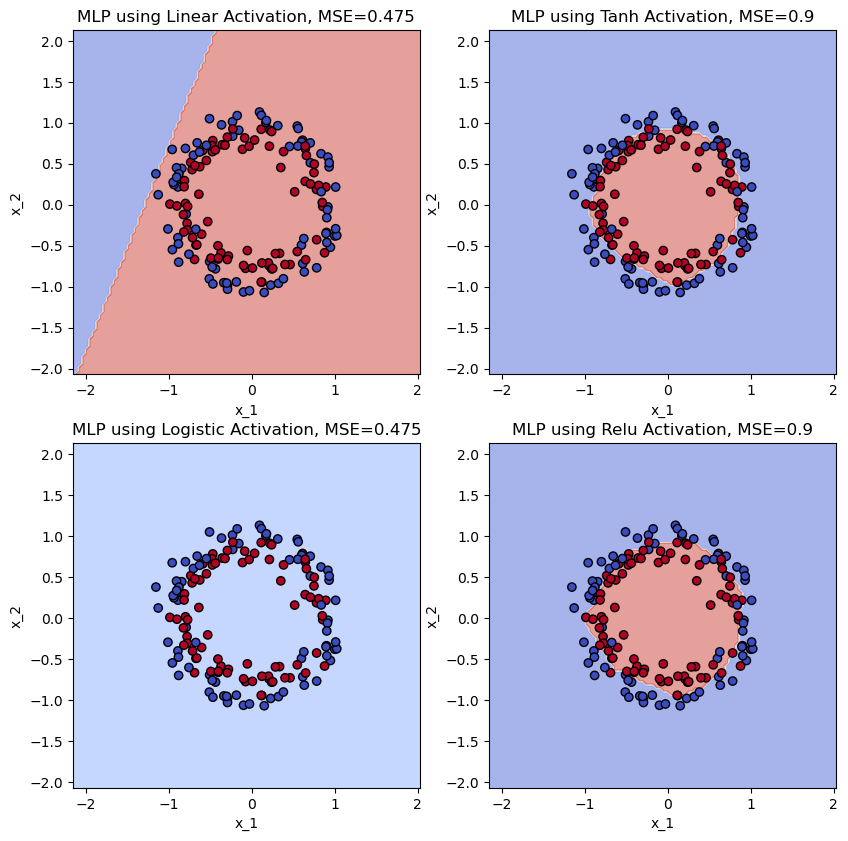

In [39]:
use_NN(X, y)

In [14]:
#import the necessary libraries
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
# generate 2d classification dataset - Moon like
X, y = make_moons(n_samples=500, shuffle=True,
                  noise=0.15, random_state=42)


/home/tonny/anaconda3/envs/sfml/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


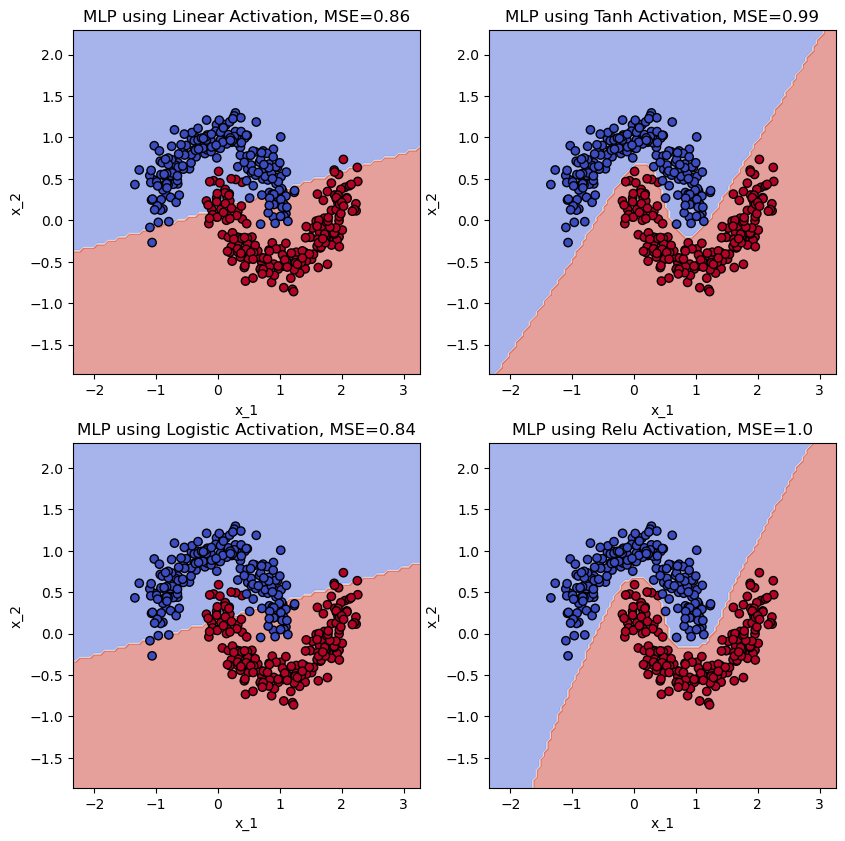

In [15]:
use_NN(X, y)

In [16]:

#import the necessary libraries
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
 
# Generate 2d classification dataset -linear classifieble
X, y = make_blobs(n_samples=500, centers=2, n_features=2, random_state=23)

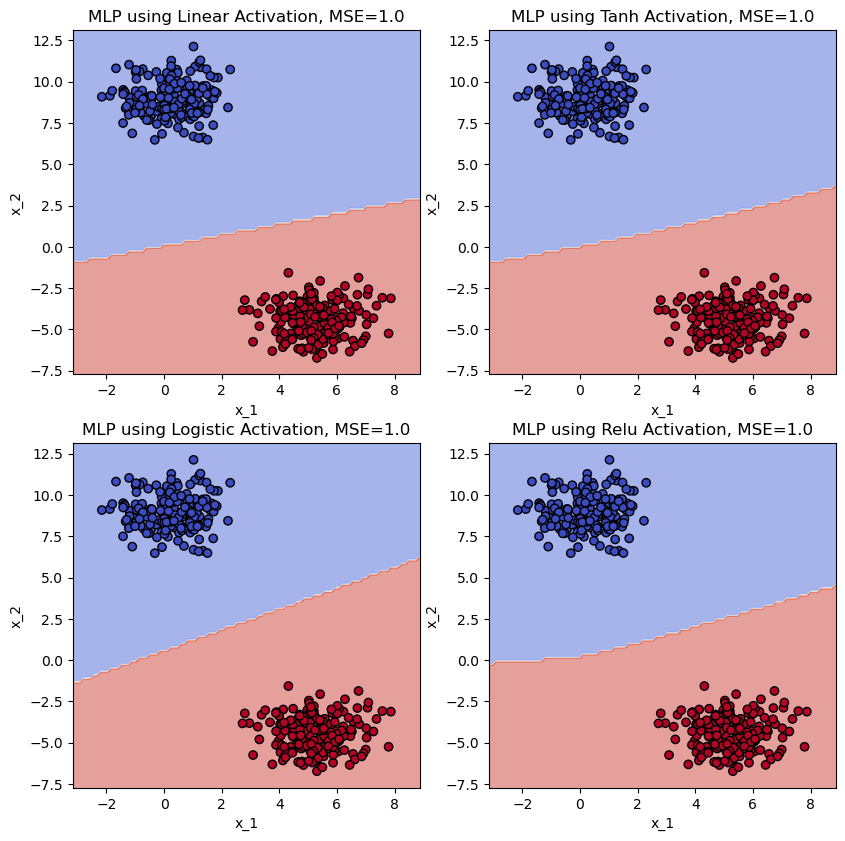

In [17]:
use_NN(X, y)

In [18]:
np.random.seed(0)
samples = 500 
red_x = np.linspace(-2.0, 2,samples)
red_y = [ .85+np.sin(x*10)* .15-(np.random.rand() * 0.1) for x in red_x ]

blue_x = np.linspace(-2,2.0,samples)
blue_y = [ .75+np.sin(x*10)* .15-(np.random.rand() * 0.1) for x in red_x ]

green_x = np.linspace(-2.0, 0,samples)
green_y = [ np.random.rand()*.5 for v in green_x ]

purple_x = np.linspace(0,2.0,samples)
purple_y = [ np.random.rand()*.5 for v in green_x ]

X = np.concatenate((
                    np.array( [ [x,y] for (x,y) in zip(red_x,red_y)]),
                    np.array( [ [x,y] for (x,y) in zip(blue_x,blue_y)]),
                    np.array( [ [x,y] for (x,y) in zip(green_x,green_y)]),
                    np.array( [ [x,y] for (x,y) in zip(purple_x,purple_y)]),
                  ))
y = np.concatenate((
                    np.repeat(0,len(red_x)),
                    np.repeat(1,len(blue_x)),
                    np.repeat(2,len(green_x)),
                    np.repeat(3,len(purple_x))
                   ))



/home/tonny/anaconda3/envs/sfml/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tonny/anaconda3/envs/sfml/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tonny/anaconda3/envs/sfml/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


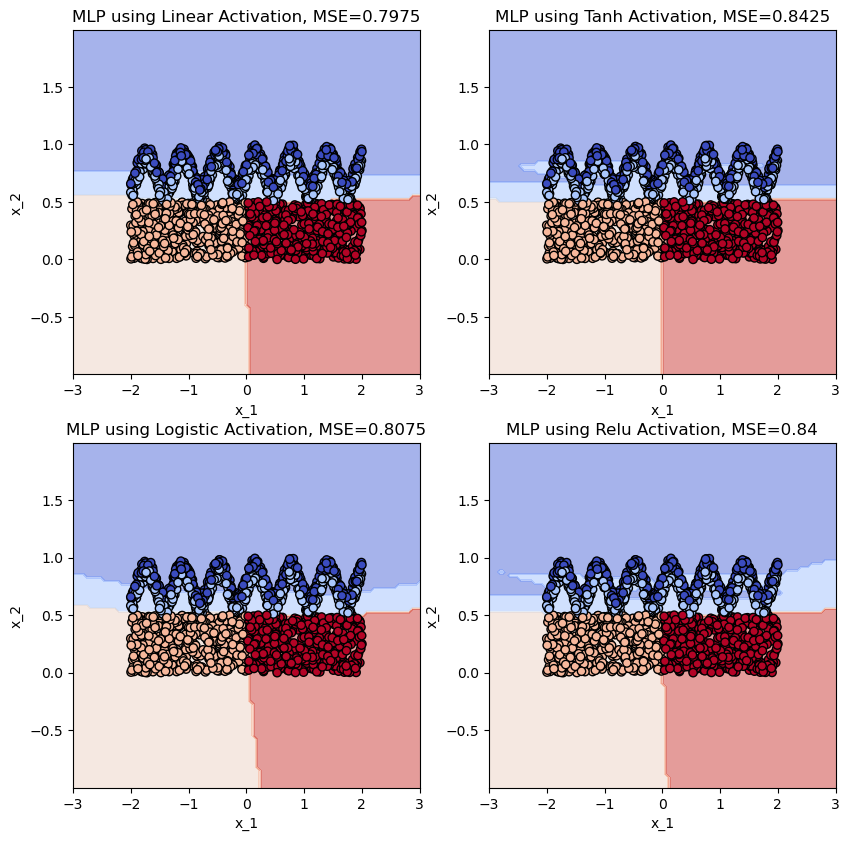

In [19]:
use_NN(X, y)

## Using real-world data

In [20]:
df = pd.read_csv('./data/anton/Cancer_Data.csv') 
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [21]:
df = df.drop(['Unnamed: 32', 'id'], axis=1)

In [22]:
df['diagnosis'].replace(['B', 'M'],
                        [0, 1], inplace=True)

In [23]:
X, y = df.drop('diagnosis', axis=1), df[['diagnosis']]

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)

In [25]:
NN = MLPClassifier(activation='identity', random_state=69)

In [26]:
NN.fit(x_train, y_train)

/home/tonny/anaconda3/envs/sfml/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='identity', random_state=69)

In [27]:
y_pred = NN.predict(x_test)

In [28]:
mse = accuracy_score(y_test,y_pred)

In [29]:
print("Mean squared error: ", mse)

Mean squared error:  0.8508771929824561
